#Diagonosis of Covid-19 - Using Deep Neural Network(DNN) and Artifical Neural Network(ANN)

* This is an assuming data as it is at the moment very difficult to secure an original data from the Sierra Leonean perspective. So I pick this data up and do this analysis as it were in the Sierra Leonean context
* In the future, I will try to develop a similar dataset and do this project again with that dataset and examin it with this program.



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [5]:
data = pd.read_excel("diagonosis_of_covid19_in_sierra_leone.xlsx")

In [7]:
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,14,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,16,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,9,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,6,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,14,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [9]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

##Now let's check for any missing values

In [10]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

##Here we're dropping columns with 90% and above of missing values

In [11]:
unuseful_data = data[data.columns[data.isna().sum()/data.shape[0] > 0.9]]
data.drop(columns=unuseful_data.columns, inplace=True)

##Now lets check for what we are left with

In [12]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Influenza B                                              0.760099
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Metapneumovirus                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydophila pneumoniae                                 0.760454
Parainflue

### Analyse the age quantile

In [15]:
fig1= ff.create_distplot([data['Patient age quantile']], ['Patient age quantile'])
fig1.show()

In [16]:
data['Patient age quantile'].value_counts()

11    380
4     366
9     360
0     334
7     319
2     316
13    311
14    302
5     293
6     282
16    279
19    275
15    269
17    261
18    260
3     251
1     233
12    197
10    190
8     166
Name: Patient age quantile, dtype: int64

It appears like the ages are not the real values, hence they have been quantized 

### Understanding the target variable

In [25]:
fig= plt.figure(figsize=(25,10))
fig= px.pie(data, names= 'SARS-Cov-2 exam result', color_discrete_sequence= px.colors.sequential.RdPu_r, hole= 0.6)
fig.update_traces(textposition = 'inside')
fig.show()

<Figure size 1800x720 with 0 Axes>

From the graph shown above it is clear that the number of positive cases out wages the negative cases.

### Understanding other categorical values

In [23]:
for col in data.select_dtypes('object'):
    fig= plt.figure(figsize=(45,30))
    if col != 'SARS-Cov-2 exam result':
      fig= px.pie(data, names= col, color_discrete_sequence= px.colors.sequential.RdPu_r, hole= 0.6, title=col)
      fig.update_traces(textposition = 'inside')
      fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

From the figures above you can see that Not-detected and Negative has the greater percentages followed by Positive with just a small percentage

### Now let Check the relationship between the targeted and other variables

By creating subsets according to the targeted column value(positive, negative)

In [26]:
positive_data = data[data['SARS-Cov-2 exam result'] == 'positive']
negative_data = data[data['SARS-Cov-2 exam result'] == 'negative']

By creating subsets according to the analysis done when checking the missing values and using the missing rate as the differentiator 

In [27]:
missing_rate = data.isna().sum()/data.shape[0]

blood_columns = data.columns[(missing_rate < 0.9) & (missing_rate >0.88)]
virus_columns = data.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

Now let Visualize the distribution between the blood columns and the target column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

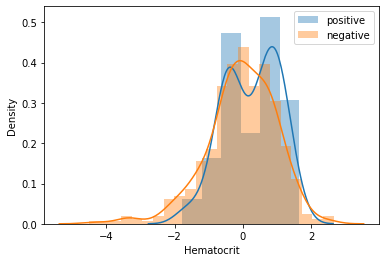

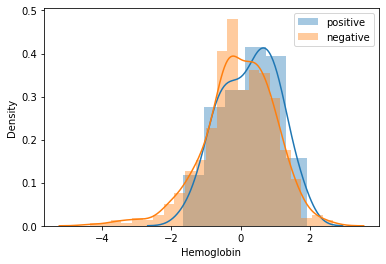

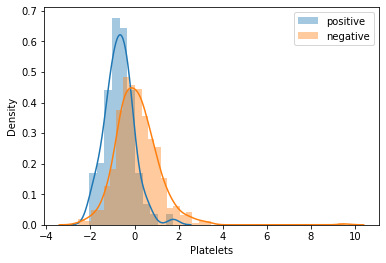

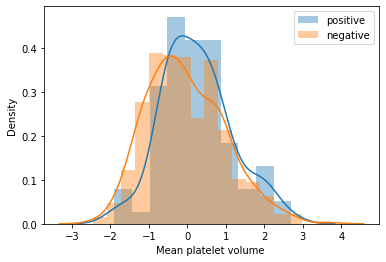

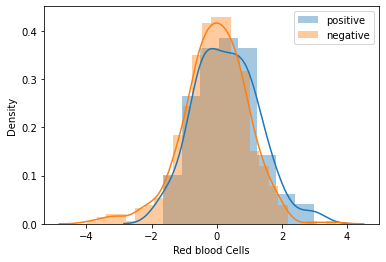

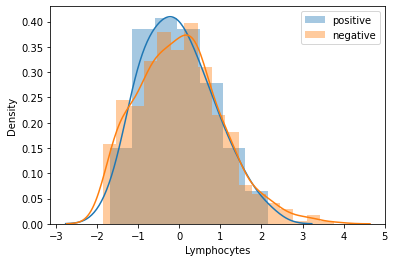

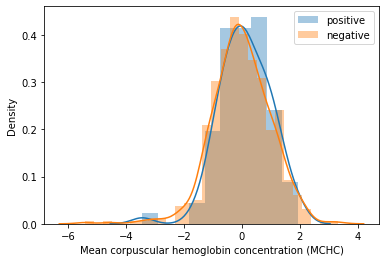

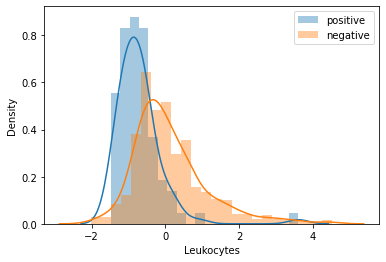

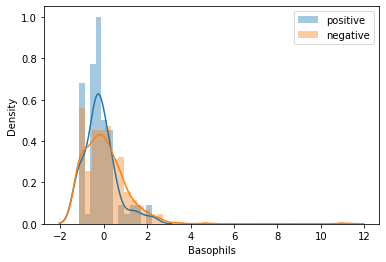

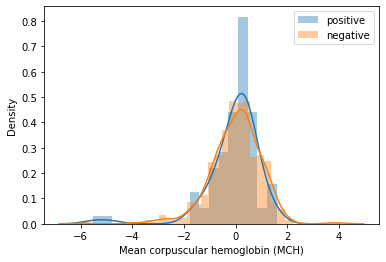

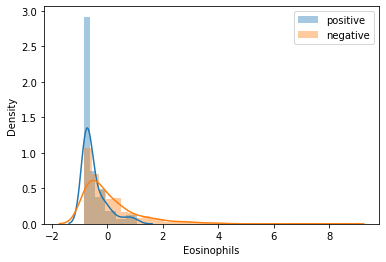

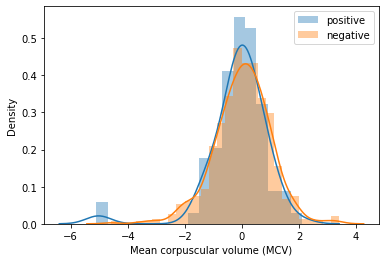

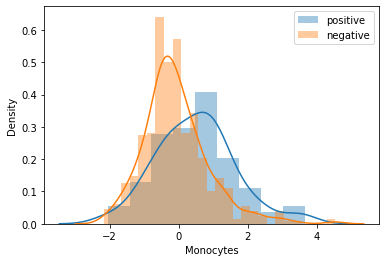

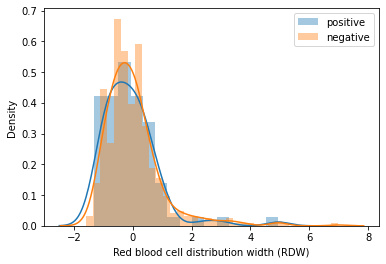

In [28]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_data[col], label='positive')
    sns.distplot(negative_data[col], label='negative')
    plt.legend()

By taking a great look at the figures presented when we tends to visualize the distribution between the blood columns and the targeted column, we can easily see that things like 
* Leukocytes
* Platelets
* Monocytes and 

With some amount of probability may contain useful information for covid-19 diagnosis

Now let visualize the distribution between the columns that contians viruses data and the targeted column

In [29]:
for col in virus_columns:
    print(pd.crosstab(data['SARS-Cov-2 exam result'], data[col]))
    print('------')

Respiratory Syncytial Virus  detected  not_detected
SARS-Cov-2 exam result                             
negative                           52          1188
positive                            0           114
------
Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1222
positive                       0           114
------
Influenza B             detected  not_detected
SARS-Cov-2 exam result                        
negative                      73          1167
positive                       4           110
------
Parainfluenza 1         detected  not_detected
SARS-Cov-2 exam result                        
negative                       3          1235
positive                       0           114
------
CoronavirusNL63         detected  not_detected
SARS-Cov-2 exam result                        
negative                      42          1196
positive                       3           111
------
Rhino

From the data presented above you can see that viruse like rhino virus has the tendency to shows some signs of being related to covid-19, but after some research we found that it is very common in the area where the data was collected and it is was not as a result of covid-19 , so it's can not be included and other things like influenza A and B are just tests and are not regarded as viruses.

### By preprocessing the data

In [30]:
def preprocessor(data):

  # data encoding
  code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
  for col in data.select_dtypes('object').columns:
      data.loc[:,col] = data[col].map(code)

  # data cleaning
  data = data.dropna(axis=0)

  return data

In [31]:
data = preprocessor(data)
data.isna().sum()

Patient ID                                               0
Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
Patient addmited to intensive care unit (1=yes, 0=no)    0
Hematocrit                                               0
Hemoglobin                                               0
Platelets                                                0
Mean platelet volume                                     0
Red blood Cells                                          0
Lymphocytes                                              0
Mean corpuscular hemoglobin concentration (MCHC)         0
Leukocytes                                               0
Basophils                                                0
Mean corpuscular hemoglobin (MCH)                        0
Eosinophils                                             

In [32]:
X = data.drop('SARS-Cov-2 exam result', axis=1)
y = data['SARS-Cov-2 exam result']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0)

### By modelling the data

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
import tensorflow as tf

model = Sequential()
model.add(Dense(50, activation=tf.nn.relu))
model.add(Dense(100, activation=tf.nn.relu))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy(), metrics=["accuracy"])
model.fit(X_train, y_train, shuffle=True, batch_size=30, epochs=15, verbose=1)
score = model.evaluate(X_train, y_train, verbose=0)

print('loss:', score[0])
print('accuracy:', score[1])

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)
print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred2=clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred2))

0.9


Lets check the f1 score

In [ ]:
print('for ANN:',f1_score(y_test, y_pred, average='macro'))
print('for Gradient Boosting:',f1_score(y_test, y_pred2, average='macro'))

for ANN: 0.4736842105263158
for Gradient Boosting: 0.4736842105263158


In [ ]:
y.value_counts()

0    86
1    13
Name: SARS-Cov-2 exam result, dtype: int64

The f1 score is very bad due to inbalanced data, lets fix it

We are going to perform over sampling in order to fill the minority value with values and make sure that our data are balanced

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
over_sampler = SMOTE()
X, y = over_sampler.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0)

#Artifical Neural Network (ANN)

In [ ]:
model.fit(X_train, y_train, shuffle=True, batch_size=30, epochs=15, verbose=1)
y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

Epoch 1/15
5/5 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 1.0000
Epoch 2/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0440 - accuracy: 1.0000
Epoch 3/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0386 - accuracy: 1.0000
Epoch 4/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 1.0000
Epoch 5/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0335 - accuracy: 1.0000
Epoch 6/15
5/5 [==============================] - 0s 5ms/step - loss: 0.0301 - accuracy: 1.0000
Epoch 7/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0282 - accuracy: 1.0000
Epoch 8/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0252 - accuracy: 1.0000
Epoch 9/15
5/5 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 1.0000
Epoch 10/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0224 - accuracy: 1.0000
Epoch 11/15
5/5 [======================

# Gradient Boosting

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred2=clf.predict(X_test)

In [ ]:
print('for ANN:',f1_score(y_test, y_pred, average='macro'))
print('for Gradient Boosting:',f1_score(y_test, y_pred2, average='macro'))

for ANN: 0.9714285714285714
for Gradient Boosting: 0.9428104575163399


##It appears as if the Artifical Neural Network (ANN) has performed better, and I would recommend that it serve as the model to be use on future data.